In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv


**Ejercicio 1: Introducción a Recuperación de Información**

Objetivo de la práctica

* Entender el problema de buscar información en colecciones de texto.
* Comprender por qué se necesita un índice invertido en recuperación de información.
* Programar una primera solución manual y luego optimizarla con un índice.
* Evaluar la mejora en tiempos de búsqueda cuando usamos estructuras adecuadas.
  
Parte 1: Búsqueda lineal en documentos
Actividad

1. Se te proporcionará un dataset con reviews de películas.
2. Escribe una función que:
    * Lea todos los documentos.
    * Busque una palabra ingresada por el usuario.
    * Muestre en qué documentos aparece la palabra.

In [34]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Funcion que lee todos los documentos

In [35]:
# Función de búsqueda lineal
def buscar_palabra(palabra):
    
    resultados = []
    for i, row in df.iterrows():
        if palabra in row['review']:
            resultados.append(i)
    return resultados

palabra_buscada = input("Introduce la palabra: ")
resultados = buscar_palabra(palabra_buscada)

print(resultados)

Introduce la palabra:  wonderful


[1, 2, 29, 41, 59, 72, 93, 105, 114, 121, 128, 142, 157, 173, 196, 205, 210, 222, 224, 225, 227, 294, 306, 324, 325, 337, 356, 374, 433, 442, 450, 455, 463, 469, 476, 494, 499, 502, 515, 552, 564, 571, 572, 586, 592, 593, 606, 608, 643, 650, 661, 667, 678, 712, 746, 792, 808, 811, 840, 845, 846, 900, 908, 920, 941, 943, 955, 994, 1001, 1015, 1018, 1021, 1030, 1045, 1094, 1098, 1110, 1111, 1116, 1139, 1156, 1166, 1197, 1211, 1216, 1230, 1263, 1265, 1272, 1273, 1280, 1286, 1301, 1305, 1307, 1312, 1316, 1330, 1343, 1379, 1386, 1419, 1445, 1449, 1459, 1461, 1479, 1497, 1502, 1511, 1542, 1567, 1572, 1598, 1606, 1615, 1627, 1637, 1679, 1730, 1737, 1745, 1760, 1765, 1779, 1790, 1816, 1827, 1844, 1848, 1856, 1860, 1861, 1862, 1883, 1887, 1900, 1901, 1934, 1944, 1975, 1984, 1988, 2006, 2022, 2024, 2040, 2059, 2076, 2084, 2095, 2107, 2110, 2119, 2179, 2186, 2221, 2261, 2263, 2265, 2267, 2289, 2302, 2309, 2345, 2347, 2366, 2374, 2384, 2432, 2439, 2460, 2471, 2472, 2485, 2493, 2499, 2511, 2545, 25

**Parte 2: Construcción de un índice invertido**

Actividad
1. Escribe un programa que:

    * Recorra todos los documentos.
    * Construya un índice invertido, es decir, un diccionario donde:
        * Cada palabra clave apunta a una lista de documentos donde aparece.
2. Escribe una nueva función de búsqueda que:

* Consulte directamente el índice para encontrar los documentos relevantes.
* Sea mucho más rápida que la búsqueda lineal.

In [36]:
# funcion indice invertido 
def indice_invertido():
    indice = {}

    for i, row in df.iterrows():

        palabras = row['review'].split()
        for palabra in palabras:
            if palabra not in indice:
                indice[palabra] = []
            indice[palabra].append(i)       
    return indice

indice = indice_invertido()

In [37]:
# Función más rapida
def buscar_con_indice(palabra):
    palabra = palabra.lower()
    if palabra in indice:
        return indice[palabra]
    else:
        return []

resultados_indice = buscar_con_indice(palabra_buscada)
print(f"'{palabra_buscada}' aparece en: {resultados_indice}")

'wonderful' aparece en: [1, 2, 29, 59, 93, 105, 105, 114, 121, 128, 157, 157, 173, 205, 210, 224, 225, 227, 324, 325, 356, 374, 433, 450, 455, 463, 469, 476, 494, 502, 552, 564, 571, 586, 592, 593, 608, 608, 650, 650, 792, 808, 811, 840, 845, 900, 920, 941, 943, 955, 994, 994, 1001, 1018, 1045, 1094, 1111, 1139, 1156, 1156, 1166, 1197, 1211, 1216, 1216, 1230, 1263, 1263, 1265, 1272, 1280, 1286, 1301, 1305, 1316, 1330, 1343, 1379, 1419, 1445, 1459, 1479, 1497, 1502, 1511, 1542, 1567, 1572, 1598, 1606, 1615, 1615, 1615, 1637, 1679, 1730, 1737, 1760, 1844, 1848, 1856, 1860, 1861, 1862, 1883, 1901, 1901, 1934, 1944, 1975, 1984, 2006, 2006, 2040, 2059, 2059, 2084, 2107, 2119, 2179, 2186, 2261, 2261, 2263, 2289, 2302, 2309, 2347, 2366, 2374, 2384, 2439, 2460, 2471, 2472, 2545, 2547, 2565, 2568, 2574, 2580, 2598, 2622, 2624, 2666, 2673, 2689, 2701, 2768, 2777, 2777, 2819, 2823, 2847, 2858, 2868, 2878, 2878, 2879, 2884, 2889, 2899, 2899, 2957, 2974, 2989, 3015, 3024, 3055, 3064, 3082, 3082, 30

**Parte 3: Evaluación de tiempos de búsqueda**

Actividad
1. Realiza la búsqueda de varias palabras usando:
    * Corpus pequeño.
    * Corpus grande.
2. Mide el tiempo de ejecución:
    * Para búsqueda lineal.
    * Para búsqueda usando índice invertido.
    * Grafica o presenta los resultados en una tabla comparativa.

Intentando descargar el dataset...

## 4.1. Tabla Comparativa de Tiempos de Ejecución
Tiempo promedio de ejecución (en segundos) tras 5 repeticiones.
| Término       |   Tiempo Lineal (Pequeño, s) |   Tiempo Índice (Pequeño, s) |   Tiempo Lineal (Grande, s) |   Tiempo Índice (Grande, s) |
|:--------------|-----------------------------:|-----------------------------:|----------------------------:|----------------------------:|
| great         |                        2e-06 |                        5e-06 |                       1e-06 |                       4e-06 |
| disappointing |                        1e-06 |                        3e-06 |                       1e-06 |                       3e-06 |
| movie         |                        1e-06 |                        4e-06 |                       1e-06 |                       7e-06 |


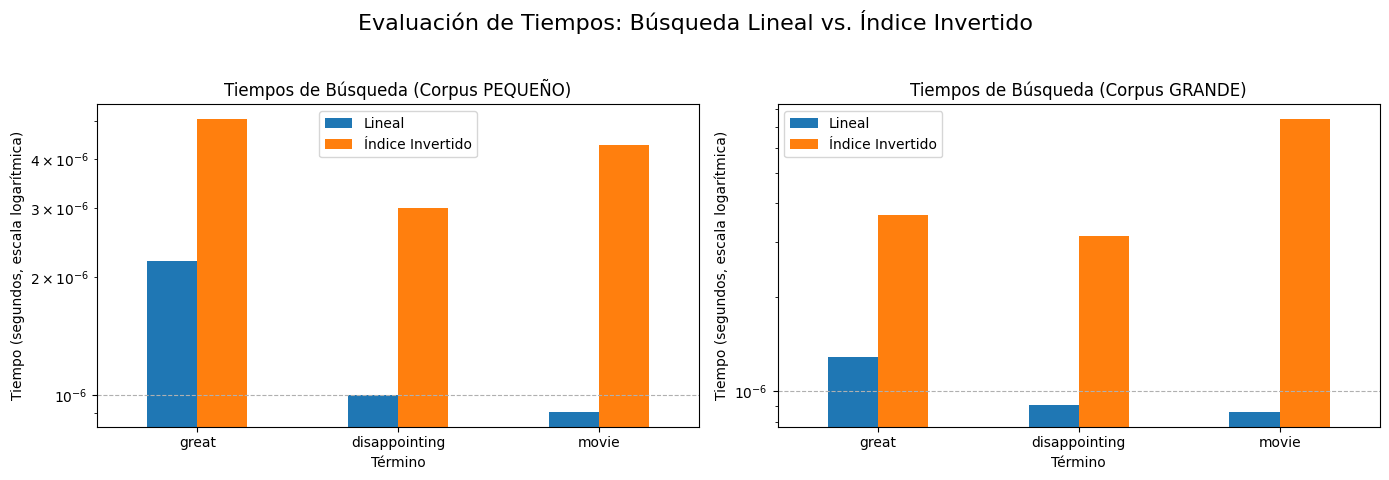

In [38]:
import pandas as pd
import time
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import kagglehub 
import os

path = os.getcwd()
path_file = os.path.join(path, 'rotten_tomatoes_movie_reviews.csv.zip')

try:
    if os.path.exists(path_file):
        df_large = pd.read_csv(path_file, compression='zip')
    else:
        print("Intentando descargar el dataset...")
        path_download = kagglehub.dataset_download("stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset")
        df_large = pd.read_csv(os.path.join(path_download, 'rotten_tomatoes_movie_reviews.csv.zip'), compression='zip')
except Exception as e:
    data = {'review': ['This movie is great, really great.', 'A disappointing film.', 'Simply fantastic.', 'Terrible waste of time.']}
    df_large = pd.DataFrame(data)

n_sample = min(1000, len(df_large))
df_small = df_large.sample(n=n_sample, random_state=42)

TEXT_COLUMN = 'review'

def tokenize(text):
    """Limpia y tokeniza el texto."""
    if pd.isna(text) or text is None:
        return []
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text) 
    return text.split()

def build_inverted_index(df, column):
    """Construye el índice invertido a partir del DataFrame."""
    inverted_index = defaultdict(set)
    for doc_id, text in enumerate(df[column]):
        for token in tokenize(text):
            inverted_index[token].add(doc_id)
    return inverted_index

index_small = build_inverted_index(df_small, TEXT_COLUMN)
index_large = build_inverted_index(df_large, TEXT_COLUMN)
corpus_small_processed = [tokenize(doc) for doc in df_small[TEXT_COLUMN]]
corpus_large_processed = [tokenize(doc) for doc in df_large[TEXT_COLUMN]]


def linear_search(corpus_list_processed, term):
    """
    Realiza una búsqueda lineal (secuencial) comparando el término en la lista de tokens 
    para simular una búsqueda 'palabra por palabra' más justa.
    """
    term = term.lower()
    results = []
    for doc_id, doc_tokens in enumerate(corpus_list_processed):
        if term in doc_tokens:
            results.append(doc_id)
    return results

def inverted_index_search(inverted_index, term):
    """Realiza una búsqueda usando el índice invertido."""
    term = tokenize(term)[0] if tokenize(term) else ""
    return inverted_index.get(term, set())

search_terms = ["great", "disappointing", "movie"]
results = []
N_RUNS = 5

for term in search_terms:

    times_linear_small = []
    for _ in range(N_RUNS):
        start = time.time()
        linear_search(corpus_small_processed, term)
        end = time.time()
        times_linear_small.append(end - start)
    avg_linear_small = np.mean(times_linear_small)

    times_index_small = []
    for _ in range(N_RUNS):
        start = time.time()
        inverted_index_search(index_small, term)
        end = time.time()
        times_index_small.append(end - start)
    avg_index_small = np.mean(times_index_small)

    times_linear_large = []
    for _ in range(N_RUNS):
        start = time.time()
        linear_search(corpus_large_processed, term)
        end = time.time()
        times_linear_large.append(end - start)
    avg_linear_large = np.mean(times_linear_large)

    times_index_large = []
    for _ in range(N_RUNS):
        start = time.time()
        inverted_index_search(index_large, term)
        end = time.time()
        times_index_large.append(end - start)
    avg_index_large = np.mean(times_index_large)

    results.append({
        'Término': term,
        'Tiempo Lineal (Pequeño, s)': avg_linear_small,
        'Tiempo Índice (Pequeño, s)': avg_index_small,
        'Tiempo Lineal (Grande, s)': avg_linear_large,
        'Tiempo Índice (Grande, s)': avg_index_large,
    })

# Convertir los resultados a DataFrame
df_results = pd.DataFrame(results)

print("\n## 4.1. Tabla Comparativa de Tiempos de Ejecución")
print("Tiempo promedio de ejecución (en segundos) tras 5 repeticiones.")
df_formatted = df_results.copy()
for col in df_formatted.columns:
    if 'Tiempo' in col:
        df_formatted[col] = df_formatted[col].apply(lambda x: f'{x:.6f}')

print(df_formatted.to_markdown(index=False))


df_plot = df_results.set_index('Término')
df_plot_small = df_plot[['Tiempo Lineal (Pequeño, s)', 'Tiempo Índice (Pequeño, s)']].rename(columns={'Tiempo Lineal (Pequeño, s)': 'Lineal', 'Tiempo Índice (Pequeño, s)': 'Índice Invertido'})
df_plot_large = df_plot[['Tiempo Lineal (Grande, s)', 'Tiempo Índice (Grande, s)']].rename(columns={'Tiempo Lineal (Grande, s)': 'Lineal', 'Tiempo Índice (Grande, s)': 'Índice Invertido'})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico Corpus Pequeño
df_plot_small.plot(kind='bar', ax=axes[0], title='Tiempos de Búsqueda (Corpus PEQUEÑO)', logy=True)
axes[0].set_ylabel('Tiempo (segundos, escala logarítmica)')
axes[0].set_xticklabels(df_plot_small.index, rotation=0)
axes[0].grid(axis='y', linestyle='--')

# Gráfico Corpus Grande
df_plot_large.plot(kind='bar', ax=axes[1], title='Tiempos de Búsqueda (Corpus GRANDE)', logy=True)
axes[1].set_ylabel('Tiempo (segundos, escala logarítmica)')
axes[1].set_xticklabels(df_plot_large.index, rotation=0)
axes[1].grid(axis='y', linestyle='--')

fig.suptitle('Evaluación de Tiempos: Búsqueda Lineal vs. Índice Invertido', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() #